In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./gm2offline_ana_7893458_15937.00027.root")
f.cd("clusterTree")
f.ls()

TFile**		./gm2offline_ana_7893458_15937.00027.root	
 TFile*		./gm2offline_ana_7893458_15937.00027.root	
  TDirectoryFile*		clusterTree	clusterTree (ClusterTree) folder
   KEY: TTree	clusters;94	clusters
   KEY: TTree	clusters;93	clusters
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder


In [3]:
t = f.Get("clusterTree").Get("clusters")

In [4]:
t.Print()

******************************************************************************
*Tree    :clusters  : clusters                                               *
*Entries : 99870478 : Total =      6791534622 bytes  File  Size = 2795647272 *
*        :          : Tree compression factor =   2.43                       *
******************************************************************************
*Br    0 :energy    : energy/D                                               *
*Entries : 99870478 : Total  Size=  798999061 bytes  File Size  =  760531572 *
*Baskets :      360 : Basket Size=   25600000 bytes  Compression=   1.05     *
*............................................................................*
*Br    1 :time      : time/D                                                 *
*Entries : 99870478 : Total  Size=  798998333 bytes  File Size  =  762480670 *
*Baskets :      360 : Basket Size=   25600000 bytes  Compression=   1.05     *
*...................................................

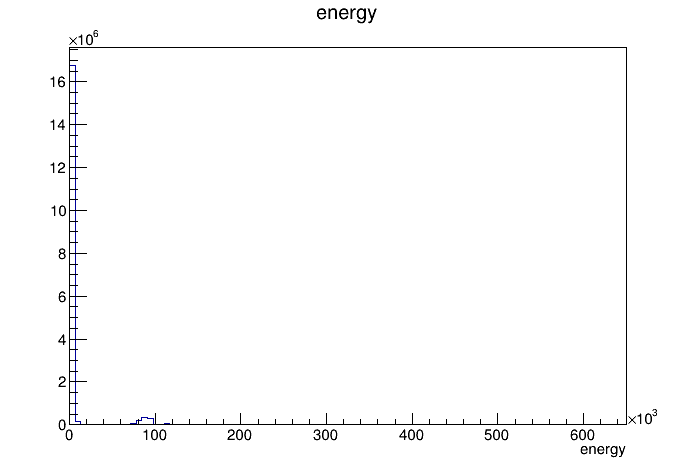

In [20]:
c = r.TCanvas()
t.Draw("energy")
c.Draw()

In [6]:
t.Draw("caloNum","","")
h = r.gPad.GetPrimitive("htemp").Clone("caloListHist")
h.SetTitle("Entries/Calorimeter Number")

In [7]:
caloBinList = []
caloList = []
for i in range(1,h.GetNbinsX()-1):

    caloBinList.append(h.FindBin(i))
    caloList.append(i)
print(caloBinList, caloList)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


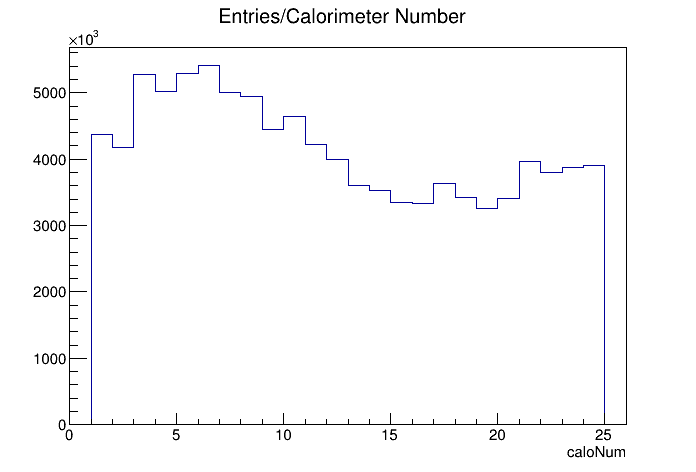

In [8]:
h.Draw()
c.Draw()

Now lets look at the number of counts per unique ID of (run, subrun, event). In order to do this, we'll draw all of those options from the tree with a cut for calorimeter number. Currently, calonum is set to 1, but we will easily be able to put this into a loop at a later date.

In [9]:
calonum = 1

In [10]:
cutString = "caloNum == "+str(calonum)
print(cutString)
c = r.TCanvas()

t.SetEstimate(-1) #https://root-forum.cern.ch/t/ttree-getv1-array-limits/3325
t.Draw("nHit:eventNum:subRunNum:runNum","","")
hUnique = r.gPad.GetPrimitive("htemp").Clone("uniqueIDhist")
print(hUnique.GetEntries())

listc = c.GetListOfPrimitives()
ding = listc.First()
print(ding)

eventNumVec = t.GetV2()
subRunNumVec = t.GetV3()
runNumVec = t.GetV4()
nHitVec = t.GetV1()

caloNum == 1
99870478.0
<ROOT.TH3F object ("htemp") at 0x7ffffb611cd0>


Error in <TBufferFile::WriteByteCount>: bytecount too large (more than 1073741822)
Error in <TBufferFile::WriteByteCount>: bytecount too large (more than 1073741822)
Error in <TBufferFile::WriteByteCount>: bytecount too large (more than 1073741822)
Error in <TBufferFile::CheckByteCount>: object of class TObjArray read too many bytes: 1198460317 instead of 124718493
Warning in <TBufferFile::CheckByteCount>: TObjArray::Streamer() not in sync with data, fix Streamer()


In [11]:
print(type(eventNumVec[0]))
for i in range(0,10):
    print(eventNumVec[i],runNumVec[i],subRunNumVec[i],nHitVec[i])
    ding = str(int(runNumVec[i])) + str(int(subRunNumVec[i])) +str(int(eventNumVec[i])) 
    print(ding)

<class 'float'>
3.0 15937.0 27.0 54.0
15937273
3.0 15937.0 27.0 2.0
15937273
3.0 15937.0 27.0 2.0
15937273
3.0 15937.0 27.0 1.0
15937273
3.0 15937.0 27.0 1.0
15937273
3.0 15937.0 27.0 2.0
15937273
3.0 15937.0 27.0 1.0
15937273
3.0 15937.0 27.0 1.0
15937273
3.0 15937.0 27.0 2.0
15937273
3.0 15937.0 27.0 1.0
15937273


Now lets create a global bin number by simply appending the event, run, and subrun numbers together. we can then loop over all of the entries in these lists and add up the ones with the same global bin number

In [12]:
'''globalBinNumber = int( str(int(runNumVec[0])) + str(int(subRunNumVec[0])) +str(int(eventNumVec[0])) )
runningTotal = 0
pairList = []
maxBin = int(hUnique.GetEntries() / 1 ) #change this denom back if you want this to work

for i in range(0,maxBin):
    globalBinNumberNew = int( str(int(runNumVec[i])) + str(int(subRunNumVec[i])) +str(int(eventNumVec[i])) )
    if(i % 10000000 == 0):
        print("Processing event:", globalBinNumberNew, "(event", i,"/",maxBin," and caloNum",calonum," )")
#    print(i, maxBin-1,globalBinNumberNew, globalBinNumber)
    if(globalBinNumber == globalBinNumberNew):
        runningTotal = runningTotal + nHitVec[i]
    elif((globalBinNumber != globalBinNumberNew) or (i == maxBin-1)):
        pairList.append((calonum, globalBinNumber,int(runNumVec[i]),int(subRunNumVec[i]), int(eventNumVec[i]),runningTotal))
        runningTotal = nHitVec[i]
    
    if(i == maxBin-1):
        pairList.append((calonum, globalBinNumber,int(runNumVec[i]),int(subRunNumVec[i]), int(eventNumVec[i]),runningTotal))
        
    globalBinNumber = globalBinNumberNew
    
print("Found", len(pairList),"unique ID(s) for Calo", calonum) '''

'globalBinNumber = int( str(int(runNumVec[0])) + str(int(subRunNumVec[0])) +str(int(eventNumVec[0])) )\nrunningTotal = 0\npairList = []\nmaxBin = int(hUnique.GetEntries() / 1 ) #change this denom back if you want this to work\n\nfor i in range(0,maxBin):\n    globalBinNumberNew = int( str(int(runNumVec[i])) + str(int(subRunNumVec[i])) +str(int(eventNumVec[i])) )\n    if(i % 10000000 == 0):\n        print("Processing event:", globalBinNumberNew, "(event", i,"/",maxBin," and caloNum",calonum," )")\n#    print(i, maxBin-1,globalBinNumberNew, globalBinNumber)\n    if(globalBinNumber == globalBinNumberNew):\n        runningTotal = runningTotal + nHitVec[i]\n    elif((globalBinNumber != globalBinNumberNew) or (i == maxBin-1)):\n        pairList.append((calonum, globalBinNumber,int(runNumVec[i]),int(subRunNumVec[i]), int(eventNumVec[i]),runningTotal))\n        runningTotal = nHitVec[i]\n    \n    if(i == maxBin-1):\n        pairList.append((calonum, globalBinNumber,int(runNumVec[i]),int(subRu

In [13]:
'''countList = [x[1] for x in pairList]''' #https://stackoverflow.com/questions/3308102/how-to-extract-the-n-th-elements-from-a-list-of-tuples-in-python

'countList = [x[1] for x in pairList]'

In [14]:
'''plt.plot(countList, "b.")
plt.ylabel('Calorimeter 1 Counts by Unique ID')
plt.show()'''

'plt.plot(countList, "b.")\nplt.ylabel(\'Calorimeter 1 Counts by Unique ID\')\nplt.show()'

We've checked that this works for calorimeter 1, so now lets go for the rest of them

In [18]:
import csv

out = open('calo_data_output_cutEnergy.csv','w')
#out = open('calo_data_output_energy.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['Calorimeter Number','Global Bin','Run Number','SubRun Number','Event Number','Counts'])

out.close()

In [19]:
for j in range(0,len(caloList)):
    calonum = caloList[j]
#    cutString = "caloNum == "+str(calonum) 
    cutString = "caloNum == "+str(calonum)+" && energy>1700 && energy<6000 && time >30*1000/1.25"
    print(cutString)
    c = r.TCanvas()

    t.SetEstimate(-1) #https://root-forum.cern.ch/t/ttree-getv1-array-limits/3325
    t.Draw("nHit:eventNum:subRunNum:runNum",cutString,"") #original, which just counts the number of events
#    t.Draw("energy:eventNum:subRunNum:runNum",cutString,"") #original, which just counts the number of events
    hUnique = r.gPad.GetPrimitive("htemp").Clone("uniqueIDhist")
    print(hUnique.GetEntries())

    listc = c.GetListOfPrimitives()
    ding = listc.First()
    print(ding)

    eventNumVec = t.GetV2()
    subRunNumVec = t.GetV3()
    runNumVec = t.GetV4()
    nHitVec = t.GetV1()
    
    globalBinNumber = int( str(int(runNumVec[0])) + str(int(subRunNumVec[0])) +str(int(eventNumVec[0])) )
    runningTotal = 0
    pairList = []
    maxBin = int(hUnique.GetEntries() / 1 )

    print("Begin Calorimeter", calonum)
    for i in range(0,maxBin):
        globalBinNumberNew = int( str(int(runNumVec[i])) + str(int(subRunNumVec[i])) +str(int(eventNumVec[i])) )
        if(i % 1000000 == 0):
            print("     Processing event:", globalBinNumberNew, "(event", i,"/",maxBin," and caloNum",calonum," )")
#        print(i, maxBin-1,globalBinNumberNew, globalBinNumber)
        if(globalBinNumber == globalBinNumberNew):
            runningTotal = runningTotal + nHitVec[i]
#        elif((globalBinNumber != globalBinNumberNew) or (i == maxBin-1)):
        else:
            pairList.append((calonum, globalBinNumber,int(runNumVec[i]),int(subRunNumVec[i]), int(eventNumVec[i]),runningTotal))
            runningTotal = nHitVec[i]

        if(i == maxBin-1):
            pairList.append((calonum, globalBinNumber,int(runNumVec[i]),int(subRunNumVec[i]), int(eventNumVec[i]),runningTotal))

        globalBinNumber = globalBinNumberNew

        
    out = open('calo_data_output_cutEnergy.csv','a')
#    out = open('calo_data_output_energy.csv','a')
    csv_out = csv.writer(out)
    for item in pairList:
        csv_out.writerow(item)
    out.close()
    
    print("Found", len(pairList),"unique ID(s) for Calo", calonum)

caloNum == 1 && energy>1700 && energy<6000 && time >30*1000/1.25
511271.0
<ROOT.TH3F object ("htemp") at 0x7ffffb611cd0>
Begin Calorimeter 1
     Processing event: 15937273 (event 0 / 511271  and caloNum 1  )
Found 18954 unique ID(s) for Calo 1
caloNum == 2 && energy>1700 && energy<6000 && time >30*1000/1.25
337071.0
<ROOT.TH3F object ("htemp") at 0x7ffffb611cd0>
Begin Calorimeter 2
     Processing event: 15937273 (event 0 / 337071  and caloNum 2  )
Found 18954 unique ID(s) for Calo 2
caloNum == 3 && energy>1700 && energy<6000 && time >30*1000/1.25
427557.0
<ROOT.TH3F object ("htemp") at 0x7ffffb611cd0>
Begin Calorimeter 3
     Processing event: 15937273 (event 0 / 427557  and caloNum 3  )
Found 18954 unique ID(s) for Calo 3
caloNum == 4 && energy>1700 && energy<6000 && time >30*1000/1.25
428178.0
<ROOT.TH3F object ("htemp") at 0x7ffffb611cd0>
Begin Calorimeter 4
     Processing event: 15937273 (event 0 / 428178  and caloNum 4  )
Found 18958 unique ID(s) for Calo 4
caloNum == 5 && ener

Alright, now that we have that data stored in the file, we can crunch the numbers.